Análise de Churn

In [3]:
#Importando as Bibliotecas

#Manipulação de Dados
import pandas as pd
import numpy as np

#Visualização de dados / Análise Exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#Configurações
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

In [4]:
telco = pd.read_csv(r"C:\Users\Henry\OneDrive\Desktop\Projetos\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telco['Churn'] = telco['Churn'].map({
    'Yes':1,
    'No':0})
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
numericas = telco.columns[telco.nunique()>=15]
categoricas = telco.columns[telco.nunique()<15]
print(f'Temos {len(numericas)} colunas numéricas e {len(categoricas)} colunas categóricas.')

Temos 4 colunas numéricas e 17 colunas categóricas.


In [8]:
#Análise Exploratória

In [18]:
colors = ['#2ECC71', '#6C5CE7']

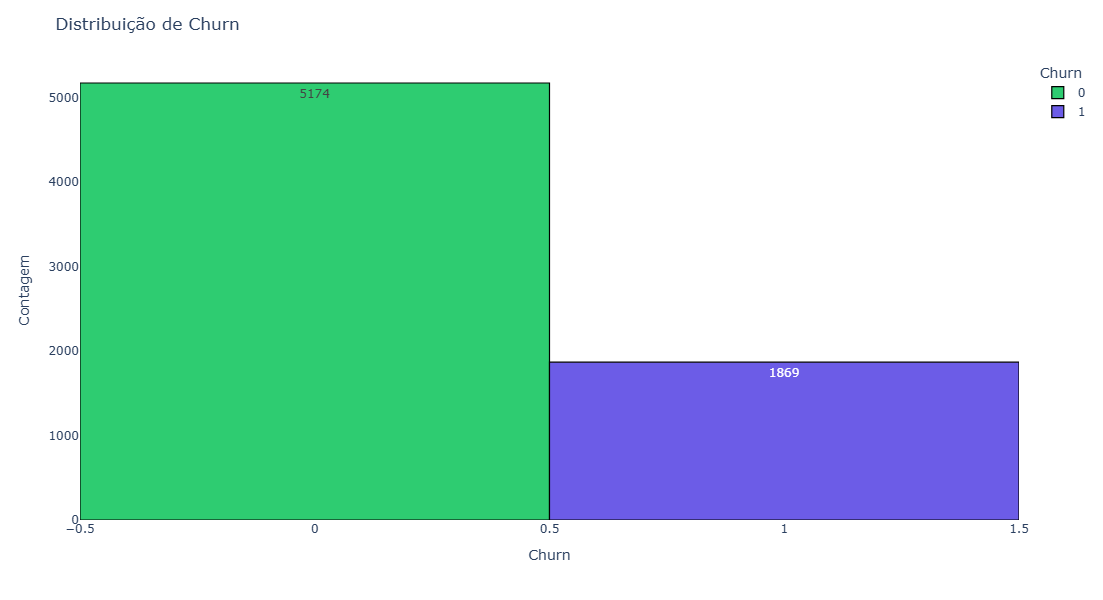

In [19]:
fig = px.histogram(telco, x='Churn', text_auto=True, color='Churn', color_discrete_sequence=colors)

fig.update_layout(
    title= 'Distribuição de Churn',
    xaxis_title= 'Churn',
    yaxis_title= 'Contagem',
    template='plotly_white',
    width=1000,
    height=600,
    legend=dict(
        bgcolor='rgba(0,0,0,0)'),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

fig.update_traces(marker_line_color='black', marker_line_width=1.2)
fig.show()

In [21]:
telco['Churn'].value_counts(normalize=True).reset_index()

,Churn,proportion
0,0,0.73463
1,1,0.26537


In [22]:
telco.groupby('Churn')['Contract'].value_counts().reset_index()

,Churn,Contract,count
0,0,Month-to-month,2220
1,0,Two year,1647
2,0,One year,1307
3,1,Month-to-month,1655
4,1,One year,166
5,1,Two year,48


In [23]:
telco.groupby('Churn')[['InternetService','PhoneService', 'TechSupport']].value_counts().reset_index()

,Churn,InternetService,PhoneService,TechSupport,count
0,0,No,Yes,No internet service,1413
1,0,Fiber optic,Yes,No,1129
2,0,DSL,Yes,Yes,803
3,0,Fiber optic,Yes,Yes,670
4,0,DSL,Yes,No,647
5,0,DSL,No,Yes,261
6,0,DSL,No,No,251
7,1,Fiber optic,Yes,No,1101
8,1,DSL,Yes,No,203
9,1,Fiber optic,Yes,Yes,196


In [24]:
churn_dependents = telco.groupby('Churn')['Dependents'].value_counts().reset_index()

In [25]:
churn_dependents

,Churn,Dependents,count
0,0,No,3390
1,0,Yes,1784
2,1,No,1543
3,1,Yes,326


In [26]:
telco.groupby('Churn')['Partner'].value_counts().reset_index()

,Churn,Partner,count
0,0,Yes,2733
1,0,No,2441
2,1,No,1200
3,1,Yes,669


In [27]:
telco.groupby('Churn')[['tenure', 'MonthlyCharges']].mean().reset_index()

,Churn,tenure,MonthlyCharges
0,0,37.569965,61.265124
1,1,17.979133,74.441332


In [28]:
bins = [0, 30, 60, 90, 120]
labels = ['0–30', '31–60', '61–90', '91–120']

telco['MonthlyCharge_Bin'] = pd.cut(telco['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

In [29]:
churn_precomensal = telco.groupby(['MonthlyCharge_Bin','Churn']).size().reset_index(name='Count')

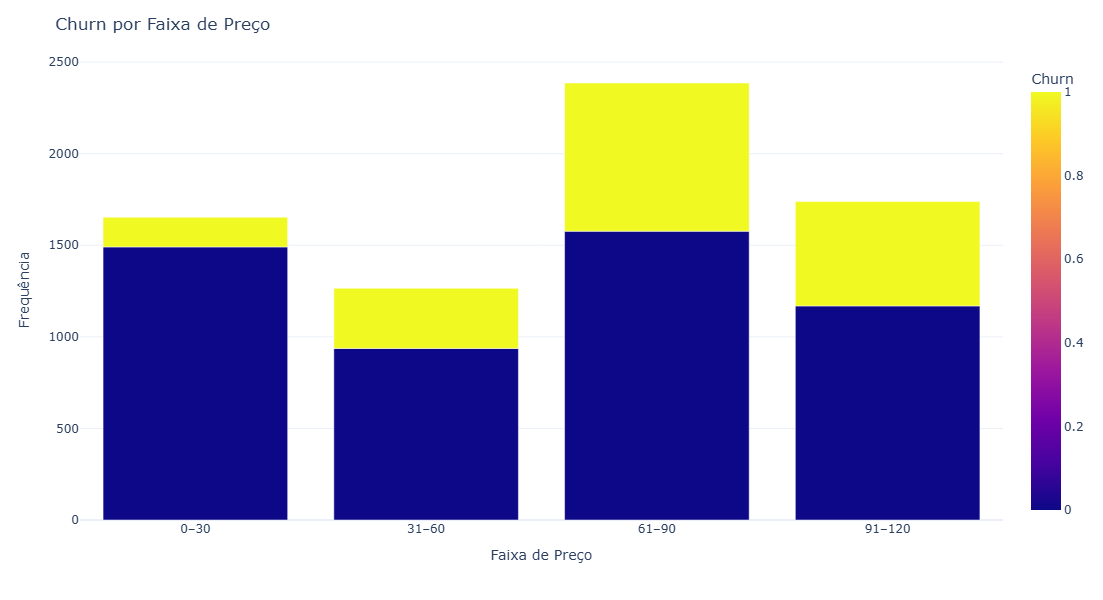

In [38]:
fig = px.bar(
    churn_precomensal,
    x='MonthlyCharge_Bin',
    y='Count',
    color='Churn',
    color_discrete_sequence=colors,
    barmode='group')

fig.update_layout(
    title='Churn por Faixa de Preço',
    xaxis_title="Faixa de Preço",
    yaxis_title='Frequência',
    template='plotly_white',
    width=1000,
    height=600
)
fig.show()

In [39]:
churn_tenure = telco.groupby('Churn')['tenure'].value_counts().reset_index()

In [40]:
churn_tenure

,Churn,tenure,count
0,0,72,356
1,0,1,233
2,0,71,164
3,0,2,115
4,0,70,108
...,...,...,...
140,1,71,6
141,1,72,6
142,1,62,5
143,1,63,4


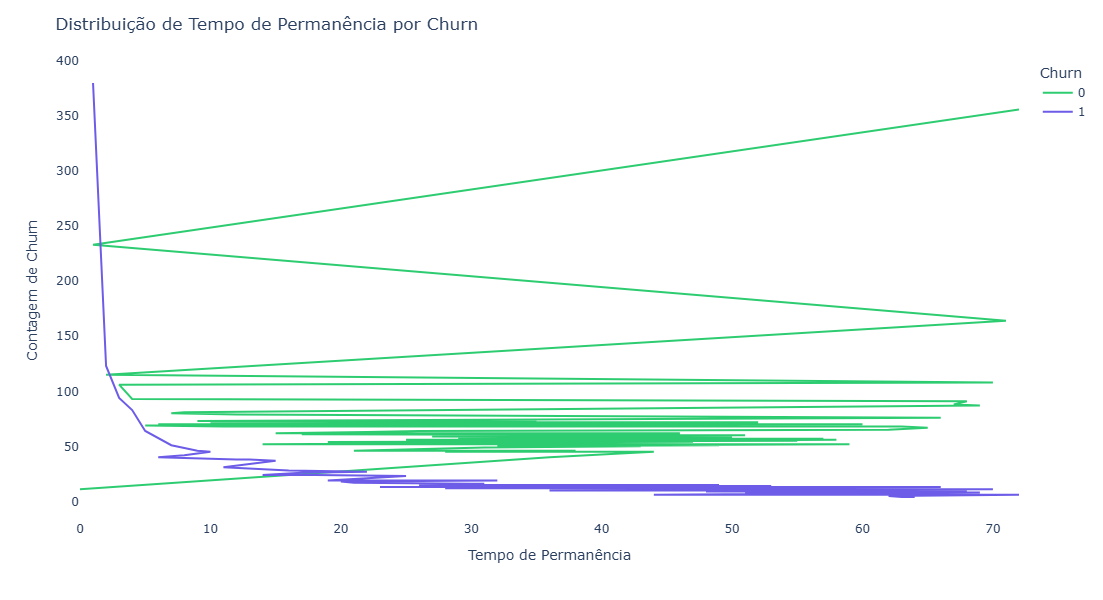

In [43]:
fig= px.line(churn_tenure, x='tenure', y='count',color='Churn',color_discrete_sequence=colors)

fig.update_layout(
    title= 'Distribuição de Tempo de Permanência por Churn',
    xaxis_title='Tempo de Permanência',
    yaxis_title='Contagem de Churn',
    template='plotly_white',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    legend=dict(bgcolor='rgba(0,0,0,0)'),
    height=600,
    width=1000
)
fig.show()


In [44]:
servicos = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

In [47]:
df = telco.copy()

In [48]:
df_bin = telco[servicos].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0,
    'DSL': 1,
    'Fiber optic': 1
})

In [49]:
df['n_serviços'] = df_bin.sum(axis=1)

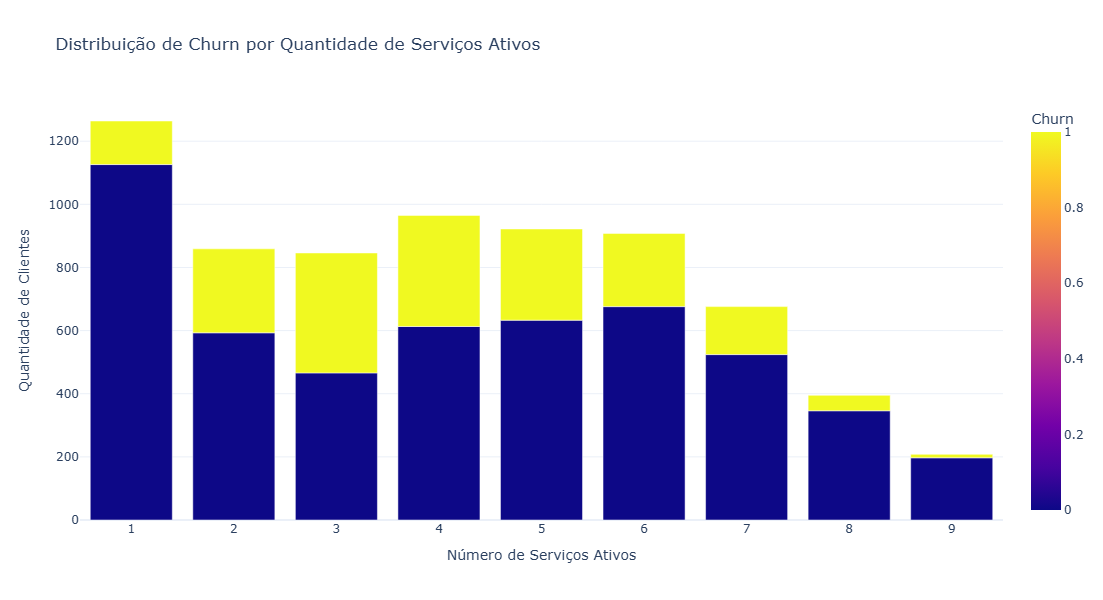

In [74]:
servico_churn = df.groupby(['n_serviços', 'Churn']).size().reset_index(name='Count')


fig = px.bar(
    servico_churn,
    x='n_serviços',
    y='Count',
    color='Churn',
    barmode='group',
    title='Distribuição de Churn por Quantidade de Serviços Ativos',
    labels={'n_serviços': 'Número de Serviços Ativos', 'Count': 'Quantidade de Clientes'},
    template='plotly_white',
    width=1000,
    height=600
)
fig.show()

In [54]:
churn_payment = telco.groupby('Churn')['PaymentMethod'].value_counts().reset_index(name='Count')

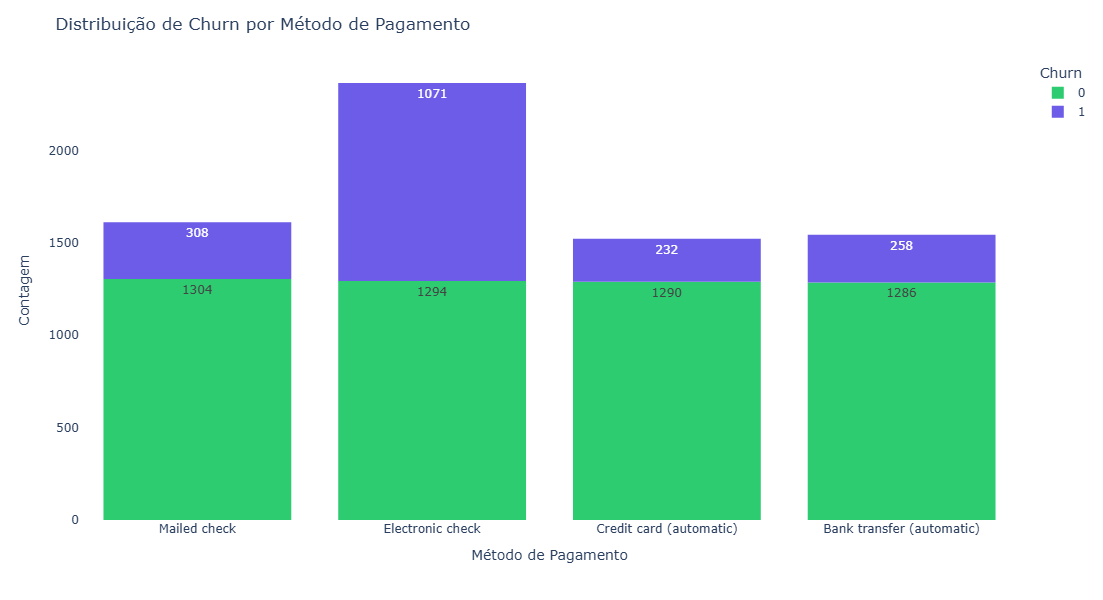

In [77]:
fig= px.histogram(churn_payment,
    x='PaymentMethod',
    y='Count',
    color='Churn',
    color_discrete_sequence=colors,
    text_auto=True)

fig.update_layout(
    title='Distribuição de Churn por Método de Pagamento',
    xaxis_title='Método de Pagamento',
    yaxis_title='Contagem',
    template='plotly_white',
    width=1000,
    height=600,
     xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    legend=dict(bgcolor='rgba(0,0,0,0)')
    
)
fig.show()

In [56]:
churn_income = telco.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean().reset_index()

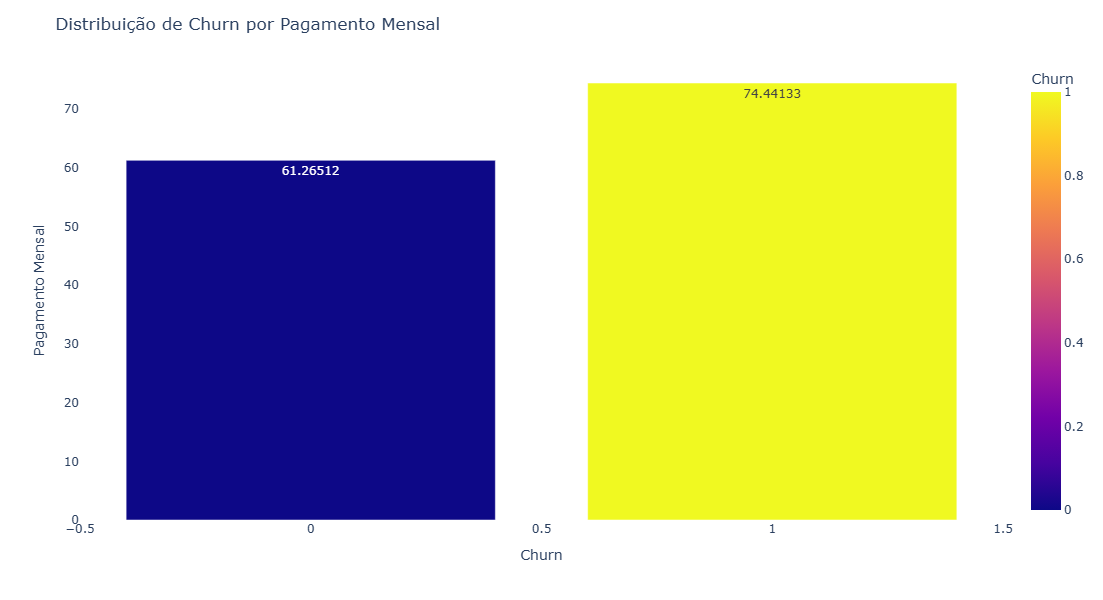

In [76]:
fig= px.bar(
    churn_income,
    x='Churn',
    y='MonthlyCharges',
    color='Churn',
    color_discrete_sequence=colors,
    text_auto=True,
)
fig.update_layout(
    title='Distribuição de Churn por Pagamento Mensal',
    xaxis_title='Churn',
    yaxis_title='Pagamento Mensal',
    template='plotly_white',
    width=1000,
    height=600,
     xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)

)
fig.show()

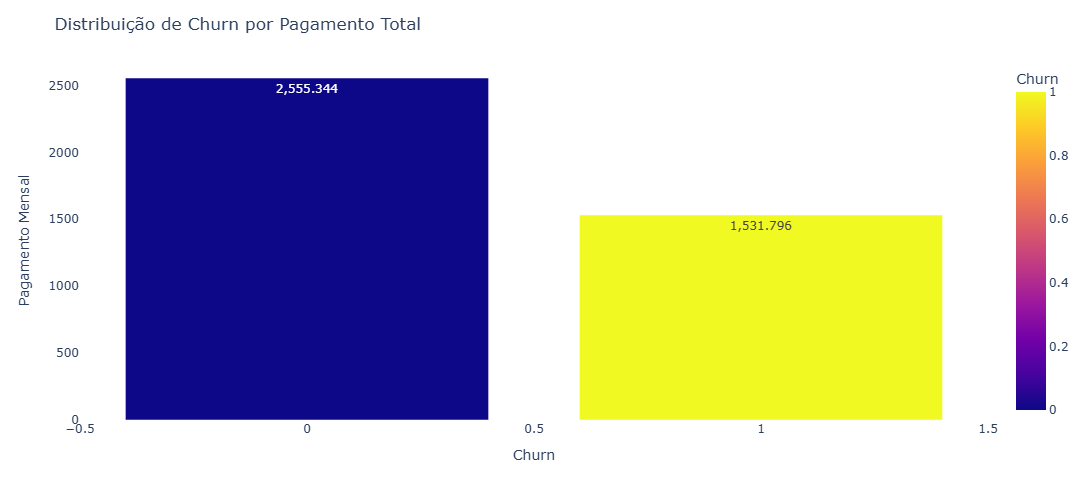

In [78]:
fig= px.bar(
    churn_income,
    x='Churn',
    y='TotalCharges',
    color='Churn',
    color_discrete_sequence=colors,
    text_auto=True
)
fig.update_layout(
    title='Distribuição de Churn por Pagamento Total',
    xaxis_title='Churn',
    yaxis_title='Pagamento Mensal',
    template='plotly_white',
    width=1000,
    height=500,
     xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)

)
fig.show()

In [79]:
numericas

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [80]:
numericas= numericas.drop('customerID')

In [81]:
numericas = df.select_dtypes(include='number') 
numericas['Churn'] = df['Churn']
numericas

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,n_serviços
0,0,1,29.85,29.85,0,2
1,0,34,56.95,1889.50,0,4
2,0,2,53.85,108.15,1,4
3,0,45,42.30,1840.75,0,4
4,0,2,70.70,151.65,1,2
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,8
7039,0,72,103.20,7362.90,0,7
7040,0,11,29.60,346.45,0,2
7041,1,4,74.40,306.60,1,3


In [83]:
correlacao= numericas.corr()

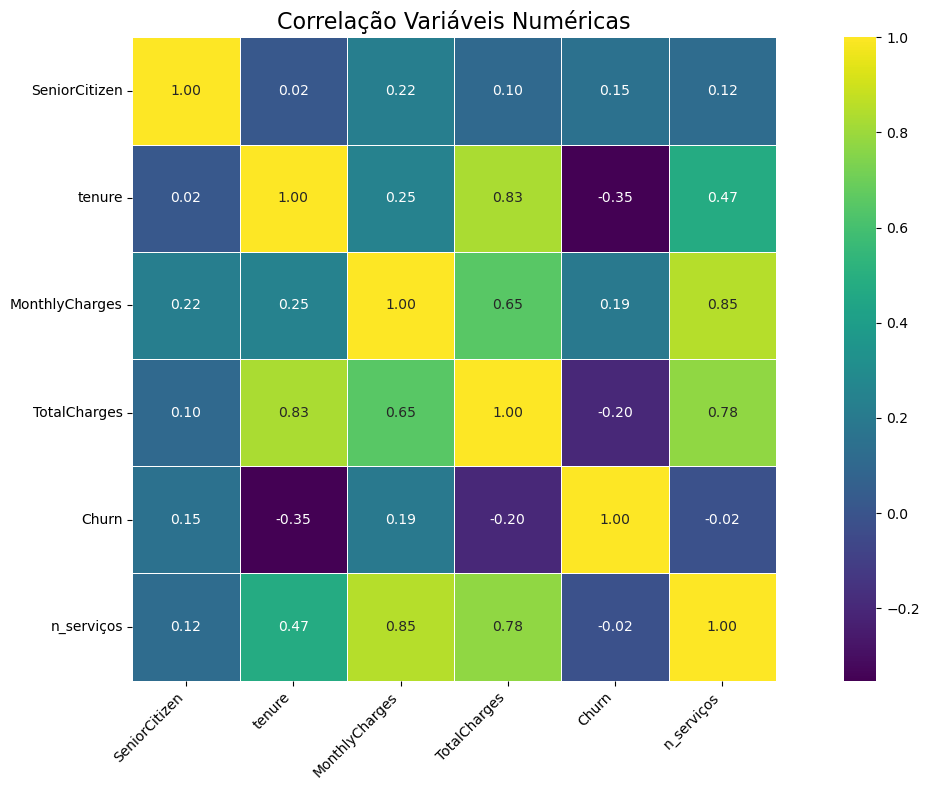

In [84]:
plt.figure(figsize=(14, 8))  # largura=14, altura=8 (similar a 1000x600 px)

sns.heatmap(correlacao,
            annot=True,         # mostra os valores nas células
            cmap='viridis',     # mesma paleta de cores
            fmt=".2f",          # duas casas decimais
            linewidths=0.5,     # separação entre as células
            linecolor='white',  # cor da linha entre células
            square=True)        # deixa as células quadradas (opcional)

plt.title('Correlação Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')  # melhora legibilidade
plt.yticks(rotation=0)
plt.tight_layout()  # evita corte nos eixos
plt.show()

In [85]:
#Análise preditiva
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, roc_curve,  accuracy_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE


In [86]:

df2 = telco.copy()

In [87]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0–30
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,31–60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,31–60
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,31–60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,61–90


In [88]:
df2 = df2.drop('MonthlyCharge_Bin', axis=1)
cat= df2.select_dtypes(include='object').columns.drop('customerID')
df2 = pd.get_dummies(df2, columns=cat, drop_first=True)

In [89]:
X=df2.drop(['customerID', 'Churn'], axis=1)
y=df2['Churn']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [91]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

In [96]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [97]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [98]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [99]:
X_train = X_train.copy()
X_train[X_train.select_dtypes(bool).columns] = X_train.select_dtypes(bool).astype(int)
X_test = X_test.copy()
X_test[X_test.select_dtypes(bool).columns] = X_test.select_dtypes(bool).astype(int)

In [100]:
pipe_log = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipe_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [101]:
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [102]:
y_pred = pipe_log.predict(X_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.7842441447835344
[[935 100]
 [204 170]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [104]:
y_pred_rf = pipe_rf.predict(X_test)
y_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]

print("📊 Acurácia:", accuracy_score(y_test, y_pred_rf))
print("🧩 Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📄 Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("📈 ROC AUC:", roc_auc_score(y_test, y_prob_rf))

📊 Acurácia: 0.7643718949609652
🧩 Matriz de Confusão:
 [[909 126]
 [206 168]]

📄 Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.57      0.45      0.50       374

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409

📈 ROC AUC: 0.7699217236301636


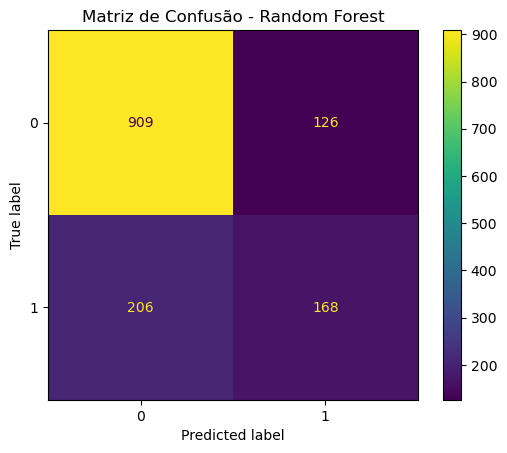

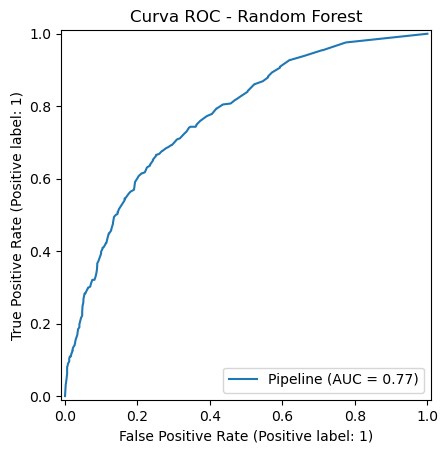

In [55]:

# Matriz de Confusão
ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

In [105]:
feature_names = pipe_rf.named_steps['preprocessing'].get_feature_names_out()
importancias = pipe_rf.named_steps['classifier'].feature_importances_

# DataFrame ordenado
df_importancia = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

print(df_importancia.head(10))

               Feature  Importance
2  num__MonthlyCharges    0.388093
3    num__TotalCharges    0.356244
1          num__tenure    0.227888
0   num__SeniorCitizen    0.027776


In [106]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [108]:
scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='recall')

print("Scores de recall em cada fold:", scores)
print("Recall médio:", scores.mean())
print("Desvio padrão:", scores.std())

Scores de recall em cada fold: [0.40468227 0.4548495  0.48160535 0.46153846 0.48829431]
Recall médio: 0.4581939799331104
Desvio padrão: 0.02946182681678293


In [109]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [110]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.35).astype(int)

In [111]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

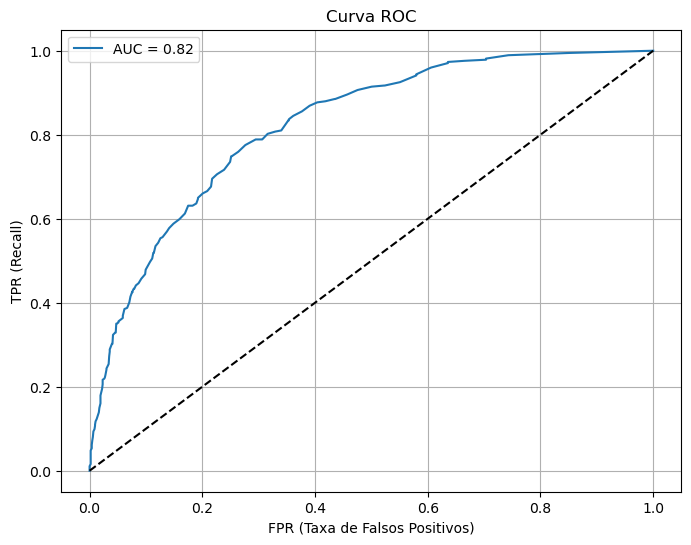

In [113]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

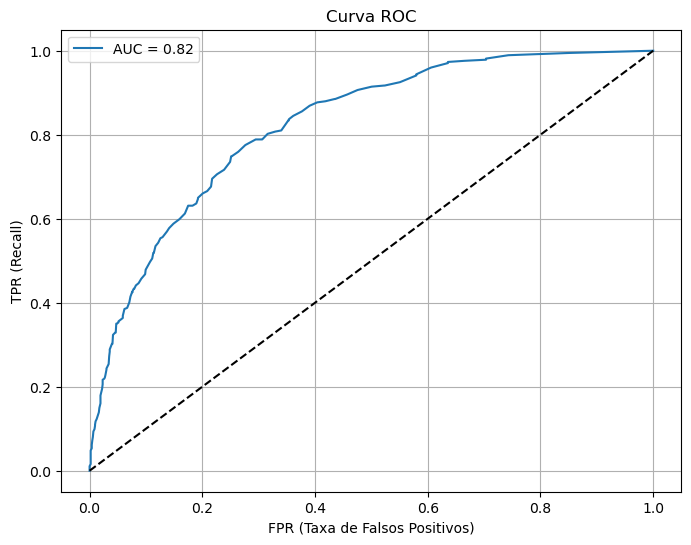

In [114]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

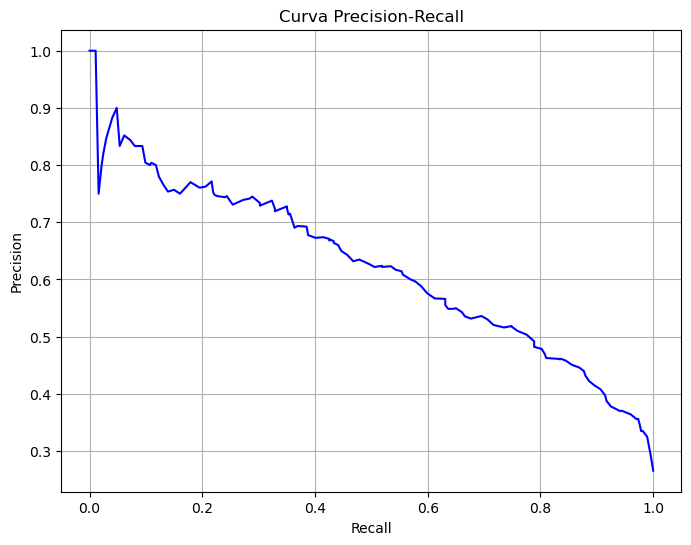

In [116]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.grid(True)
plt.show()

In [117]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

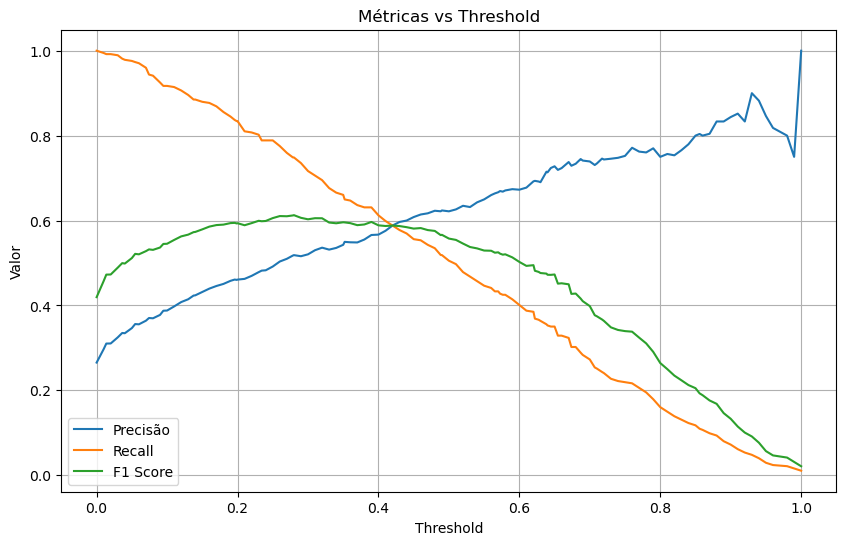

In [118]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label="Precisão")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Métricas vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Melhor threshold baseado no F1-score: {best_threshold:.2f}")

Melhor threshold baseado no F1-score: 0.28


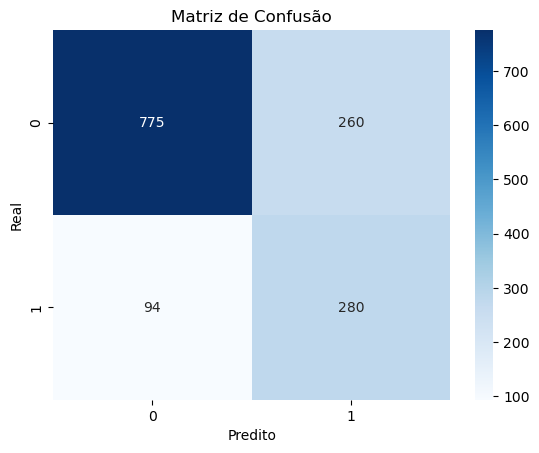


Relatório de Classificação (com threshold ajustado):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [120]:
y_pred_thresh = (y_proba >= best_threshold).astype(int)

# 9. Matriz de confusão e relatório
cm = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

print("\nRelatório de Classificação (com threshold ajustado):")
print(classification_report(y_test, y_pred_thresh))

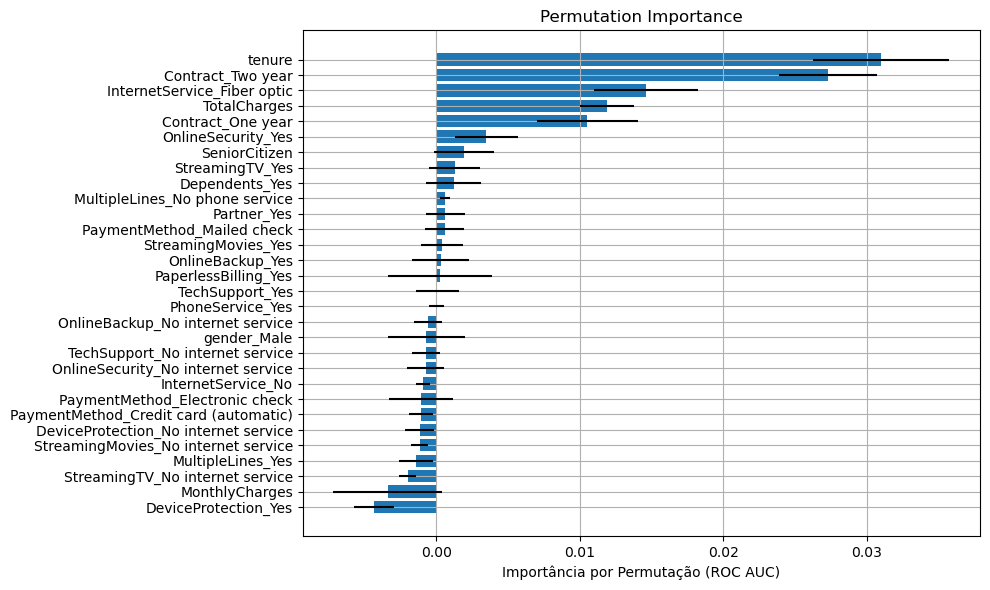

In [121]:
r = permutation_importance(model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42)

# Organizar resultados
importances_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plotar
plt.figure(figsize=(10,6))
plt.barh(importances_df['feature'], importances_df['importance_mean'], xerr=importances_df['importance_std'])
plt.xlabel("Importância por Permutação (ROC AUC)")
plt.title("Permutation Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
#Clusterização

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecione variáveis relevantes para a segmentação
X_cluster = df2[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()
df2_clean = df2.loc[X_cluster.index].copy()  # mantém só as linhas sem NaN

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

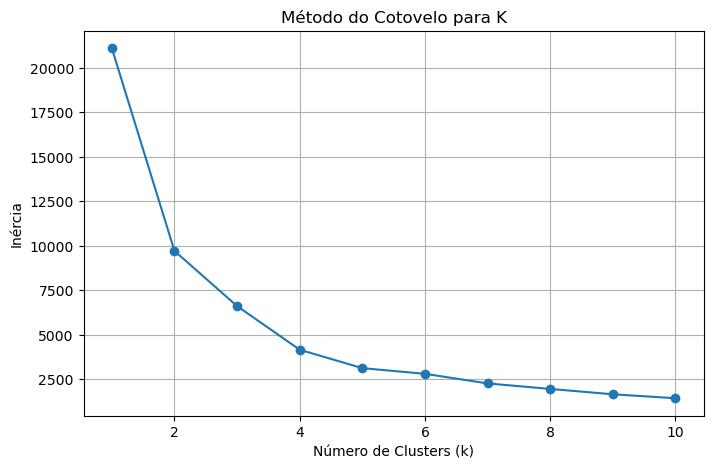

In [124]:

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')# Filtrar o df2 com base nas mesmas linhas válidas do X_cluster
df2_clean = df2.loc[X_cluster.index].copy()

# Continuar com normalização e k-means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df2_clean['cluster'] = kmeans.fit_predict(X_scaled)
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K')
plt.grid(True)
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4, random_state=42)
df2_clean['cluster'] = kmeans.fit_predict(X_scaled)

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled) 

In [132]:
df2_clean['pca1'] = pca_components[:, 0]
df2_clean['pca2'] = pca_components[:, 1]

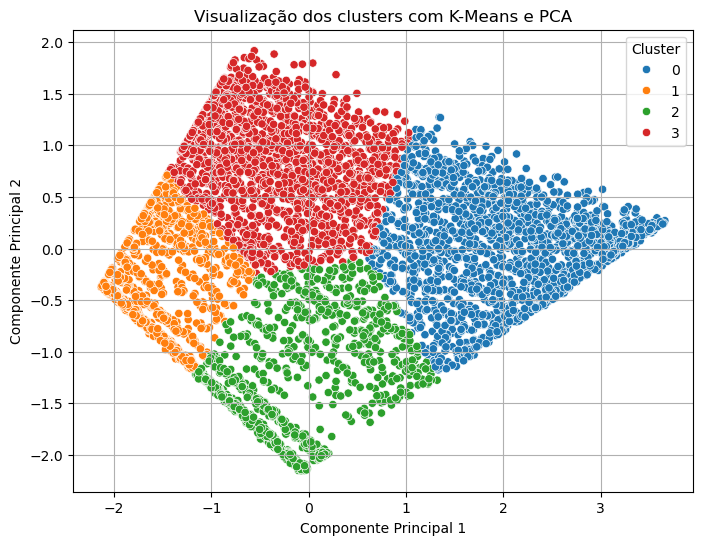

In [133]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2_clean, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Visualização dos clusters com K-Means e PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [129]:
telco['proba_churn'] =  model.predict_proba(X)[:, 1]

In [134]:
threshold = 0.35
telco['pred_churn_custom'] = (telco['proba_churn'] >= threshold).astype(int)

In [135]:
telco['cluster'] = np.nan
telco.loc[telco.index, 'cluster'] = df2_clean['cluster']


In [136]:
telco['cluster'] = pd.to_numeric(telco['cluster'], errors='coerce')
telco['proba_churn'] = pd.to_numeric(telco['proba_churn'], errors='coerce')
telco['MonthlyCharge_Bin'] = pd.to_numeric(telco['MonthlyCharge_Bin'], errors='coerce')


In [137]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Bin,proba_churn,pred_churn_custom,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,NaN,0.23,0,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,0,NaN,0.03,0,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,NaN,0.83,1,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,NaN,0.00,0,2.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,NaN,0.86,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.50,0,NaN,0.05,0,3.0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,0,NaN,0.03,0,0.0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,0,NaN,0.08,0,1.0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,1,NaN,0.68,1,3.0


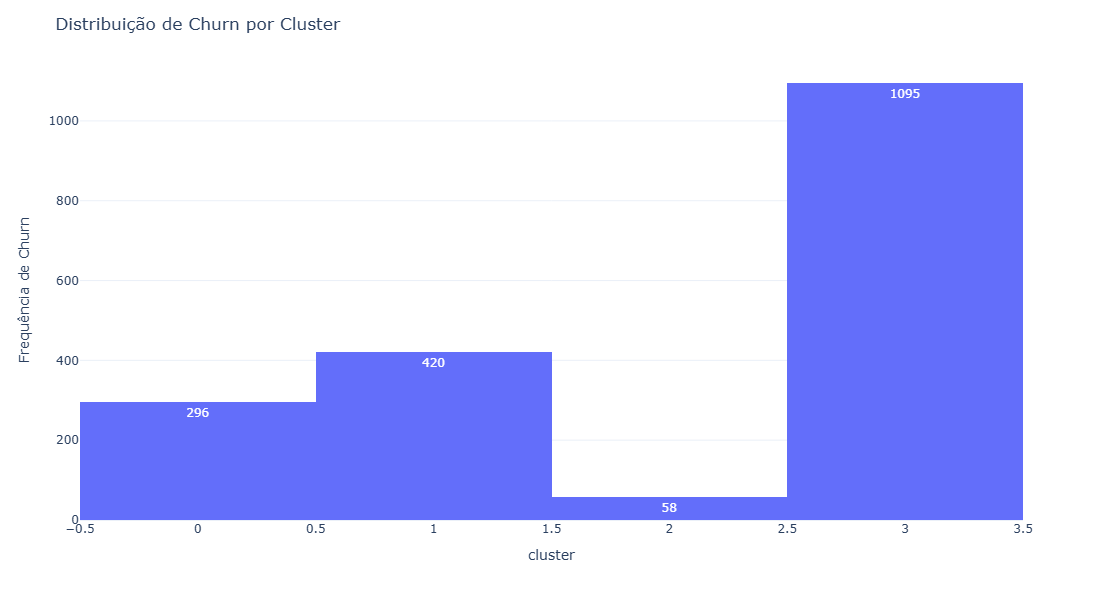

In [138]:
fig= px.histogram(
    telco,
    x='cluster',
    y='Churn',
    text_auto=True
)
fig.update_layout(
    title='Distribuição de Churn por Cluster',
    xaxis_title='cluster',
    yaxis_title='Frequência de Churn',
    template='plotly_white',
    width=1000,
    height=600
)
fig.show()

In [95]:
telco.groupby('cluster')[['MonthlyCharges', 'tenure', 'proba_churn']].mean().reset_index()

,cluster,MonthlyCharges,tenure,proba_churn
0,0.0,93.206110,59.463185,0.162371
1,1.0,31.784336,10.263127,0.244814
2,2.0,34.719341,53.564614,0.054198
3,3.0,80.769260,15.408550,0.482055


In [80]:
telco.to_csv('telco_churn', sep=';', decimal=',', index=False)